In [1]:
import pandas as pd
pd.set_option("display.width", 380)
pd.set_option('max_colwidth', 200)

from langdetect import detect

from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# initial dataframe

dataframe_initial = pd.read_csv('export_articles_EGC_2004_2018.csv', sep='\t')

In [3]:
# print first 10 data

dataframe_initial.head(10)

,series,booktitle,year,title,abstract,authors,pdf1page,pdfarticle
0,Revue des Nouvelles Technologies de l'Information,EGC,2018,#Idéo2017 : une plateforme citoyenne dédiée à l'analyse des tweets lors des événements politiques,"Cette plateforme a pour objectif de permettre aux citoyens d'analyserpar eux-mêmes les tweets politiques lors d'événements spécifiques en France.Pour le cas de l'élection présidentielle de 2017, #...","Claudia Marinica, Julien Longhi, Nader Hassine, Abdulhafiz Alkhouli, Boris Borzic",http://editions-rnti.fr/render_pdf.php?p1&p=1002425,http://editions-rnti.fr/render_pdf.php?p=1002425
1,Revue des Nouvelles Technologies de l'Information,EGC,2018,A two level co-clustering algorithm for very large data sets,La classification croisée (co-clustering) est une technique qui permet d'extraire la structuresous-jacente existante entre les lignes et les colonnes d'une table de données sous forme de blocs. Pl...,"Marius Barctus, Marc Boullé, Fabrice Clérot",http://editions-rnti.fr/render_pdf.php?p1&p=1002372,http://editions-rnti.fr/render_pdf.php?p=1002372
2,Revue des Nouvelles Technologies de l'Information,EGC,2018,ALGeoSPF: Un modèle de factorisation basé sur du clustering géographique pour la recommandation de POI,La recommandation de points d'intérêts est devenue une caractéristiqueessentielle des réseaux sociaux géo-localisés qui a accompagnél'émergence des échanges massifs de données digitales. Cependant...,"Jean-Benoît Griesner, Talel Abdesssalem, Hubert Naacke, Pierre Dosne",http://editions-rnti.fr/render_pdf.php?p1&p=1002380,http://editions-rnti.fr/render_pdf.php?p=1002380
3,Revue des Nouvelles Technologies de l'Information,EGC,2018,Analyse des sentiments à partir des commentaires Facebook publiés en Arabe standard ou dialectal marocain par une approche d'apprentissage automatique,"L'analyse des sentiments est un processus pendant lequel la polarité(positive, négative ou neutre) d'un texte donné est déterminée. Nous nous intéressonsdans ce travail à l'analyse des sentiments ...","Abdeljalil Elouardighi, Mohcine Maghfour, Hafdalla Hammia, Fatima-Zahra Aazi",http://editions-rnti.fr/render_pdf.php?p1&p=1002397,http://editions-rnti.fr/render_pdf.php?p=1002397
4,Revue des Nouvelles Technologies de l'Information,EGC,2018,Analyse en rôles sémantiques pour le résumé automatique,Cet article présente une approche visant à extraire les informations expriméesdans un corpus de textes et en produire un résumé. Plusieurs variantes deméthodes extractives de résumé de texte ont é...,"Elyase Lassouli, Yasmine Mesbahi, Camille Pradel, Damien Sileo",http://editions-rnti.fr/render_pdf.php?p1&p=1002384,http://editions-rnti.fr/render_pdf.php?p=1002384
5,Revue des Nouvelles Technologies de l'Information,EGC,2018,Analyse Ontologique de scénario dans un contexte Big Data,NaN,"Marwan Batrouni, Aurélie Bertaux, Christophe Nicolle",http://editions-rnti.fr/render_pdf.php?p1&p=1002414,http://editions-rnti.fr/render_pdf.php?p=1002414
6,Revue des Nouvelles Technologies de l'Information,EGC,2018,Apport de la fouille de données pour la prévention du risque suicidaire,"Avec plus de 800 000 décès par an dans le monde, le suicide est latroisième cause de décès évitable. Il y a 20 fois plus de tentatives, impliquant denombreuses hospitalisations, des coûts humains ...","Romain Billot, Sofian Berrouiguet, Mark Larsen, Michel Walter, Jorge López Castroman, Enrique Baca-García, Philippe Courtet, Philippe Lenca",http://editions-rnti.fr/render_pdf.php?p1&p=1002376,http://editions-rnti.fr/render_pdf.php?p=1002376
7,Revue des Nouvelles Technologies de l'Information,EGC,2018,Apport des modèles locaux pour les K-moyennes prédictives,"Dans le cadre du clustering prédictif, pour attribuer la classe aux groupesformés à la fin de la phase d'apprentissage, le vote majoritaire est la méthodecommunément utilisée. Cependant, cette app...","Vincent Lemaire, Oumaima Alaoui Ismaili",http://editions-rnti.fr/render_pdf.php?p1&p=1002379,http://editions-rnti.fr/render_pdf

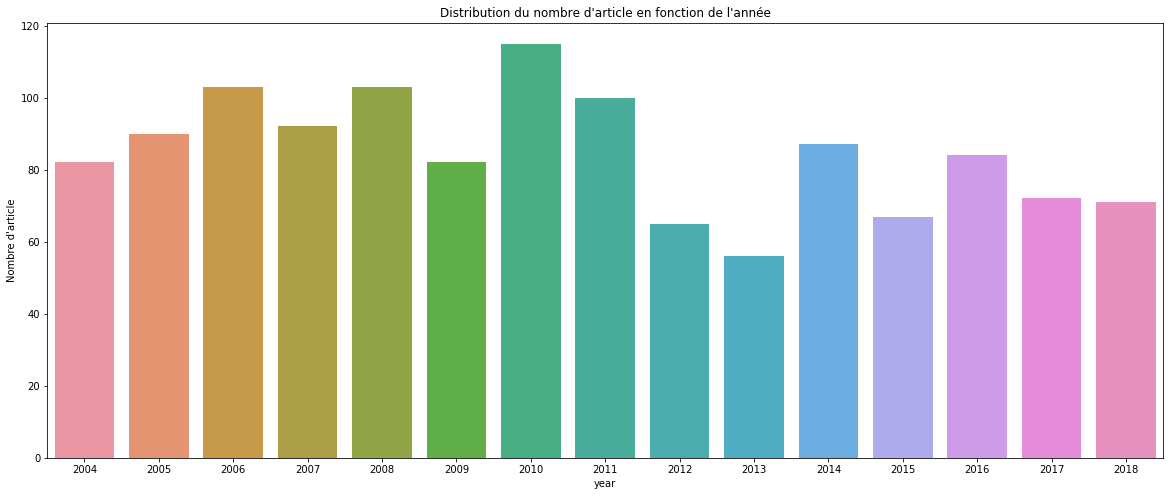

1269 articles


In [4]:
# plot distribution by year

invYr = dataframe_initial.groupby(['year']).count()
sns.barplot(x=invYr.index, y=invYr.series)
plt.title("Distribution du nombre d'article en fonction de l'année")
plt.ylabel("Nombre d'article")
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show()

print("%d articles" % len(dataframe_initial))

In [5]:
# Use spacy lib
# On https://spacy.io/
import spacy
nlp = spacy.load('fr')

import string
import nltk
from nltk.corpus import stopwords

# Datas preprocessing methods.
# Lemmatisation without poncutations

stemmer = nltk.stem.snowball.FrenchStemmer()
fstw = stopwords.words('french')

# French Stop Words, extraits depuis le fichier stopwords-fr.txt + stopwords french de nltk
sourceFST = [x.replace('\n', '') for x in open('stopwords-fr.txt', mode="r", encoding="utf-8").readlines()]+fstw

def lemmatize(article):
    res = ''
    output = []
    outPonc = article.translate(article.maketrans("","", string.punctuation))
    outLem = nlp(outPonc)
    for token in outLem:
        if token.lemma_ not in sourceFST:
            output.append(token.lemma_)
    res = ' '.join(output)
    return res

In [6]:
#fonction to lemmatize a dataframe
def lemmatize_df(df):
    for index, row in df.iterrows():
        if isinstance(df.at[index,'abstract'] , str):
            #print(df.at[index,'abstract'])
            abstract_lemmatized = lemmatize(df.at[index,'abstract'])
            
            df.at[index,'abstract_prepro']= abstract_lemmatized
    return df

In [7]:
# set to "True" is you want to create a new dataframe
# change the name to avoid overwrite
# take ~7 min to compute

create_new_dataframe = False

if create_new_dataframe:
    dataframe_prepro = dataframe_initial.copy()
    dataframe_prepro = lemmatize_df(dataframe_prepro)
    dataframe_prepro.to_csv('dataframe_prepro_5.csv', sep='\t', encoding='utf-8')
else:
    dataframe_prepro = pd.read_csv('dataframe_prepro_4.csv', sep='\t')

In [8]:
#print dataframe after preprocessing

dataframe_prepro.head(10)

,Unnamed: 0,series,booktitle,year,title,abstract,authors,pdf1page,pdfarticle,abstract_prepro
0,0,Revue des Nouvelles Technologies de l'Information,EGC,2018,#Idéo2017 : une plateforme citoyenne dédiée à l'analyse des tweets lors des événements politiques,"Cette plateforme a pour objectif de permettre aux citoyens d'analyserpar eux-mêmes les tweets politiques lors d'événements spécifiques en France.Pour le cas de l'élection présidentielle de 2017, #...","Claudia Marinica, Julien Longhi, Nader Hassine, Abdulhafiz Alkhouli, Boris Borzic",http://editions-rnti.fr/render_pdf.php?p1&p=1002425,http://editions-rnti.fr/render_pdf.php?p=1002425,plateforme objectif permettre citoyen danalyserpar euxmême tweet politique dévénement spécifique francepour cas lélection présidentiel 2017 idéo2017 analyser quasitemp réel message candidat fourni...
1,1,Revue des Nouvelles Technologies de l'Information,EGC,2018,A two level co-clustering algorithm for very large data sets,La classification croisée (co-clustering) est une technique qui permet d'extraire la structuresous-jacente existante entre les lignes et les colonnes d'une table de données sous forme de blocs. Pl...,"Marius Barctus, Marc Boullé, Fabrice Clérot",http://editions-rnti.fr/render_pdf.php?p1&p=1002372,http://editions-rnti.fr/render_pdf.php?p=1002372,classification croisé coclustering technique permettre dextraire structuresousjacente existant entrer ligne colonne dune tabler donnée sou former bloc application utiliser technique algorithme coc...
2,2,Revue des Nouvelles Technologies de l'Information,EGC,2018,ALGeoSPF: Un modèle de factorisation basé sur du clustering géographique pour la recommandation de POI,La recommandation de points d'intérêts est devenue une caractéristiqueessentielle des réseaux sociaux géo-localisés qui a accompagnél'émergence des échanges massifs de données digitales. Cependant...,"Jean-Benoît Griesner, Talel Abdesssalem, Hubert Naacke, Pierre Dosne",http://editions-rnti.fr/render_pdf.php?p1&p=1002380,http://editions-rnti.fr/render_pdf.php?p=1002380,recommandation point dintérêts devenir caractéristiqueessentielle réseau social géolocaliser accompagnélémergence échange massif donnée digital cependantle faible densité point dintérêts visiter u...
3,3,Revue des Nouvelles Technologies de l'Information,EGC,2018,Analyse des sentiments à partir des commentaires Facebook publiés en Arabe standard ou dialectal marocain par une approche d'apprentissage automatique,"L'analyse des sentiments est un processus pendant lequel la polarité(positive, négative ou neutre) d'un texte donné est déterminée. Nous nous intéressonsdans ce travail à l'analyse des sentiments ...","Abdeljalil Elouardighi, Mohcine Maghfour, Hafdalla Hammia, Fatima-Zahra Aazi",http://editions-rnti.fr/render_pdf.php?p1&p=1002397,http://editions-rnti.fr/render_pdf.php?p=1002397,lanalyse sentiment processus pendre polaritépositive négatif neutre dun texte donner déterminer intéressonsdans travail lanalyse sentiment partir commentairesfacebook réel partagé arabe standard d...
4,4,Revue des Nouvelles Technologies de l'Information,EGC,2018,Analyse en rôles sémantiques pour le résumé automatique,Cet article présente une approche visant à extraire les informations expriméesdans un corpus de textes et en produire un résumé. Plusieurs variantes deméthodes extractives de résumé de texte ont é...,"Elyase Lassouli, Yasmine Mesbahi, Camille Pradel, Damien Sileo",http://editions-rnti.fr/render_pdf.php?p1&p=1002384,http://editions-rnti.fr/render_pdf.php?p=1002384,article présenter approcher viser extraire information expriméesdans corpus texte produire résumer variante deméthode extractif résumer texte implémenter évaluée leurprincipal originalité résider ...
5,5,Revue des Nouvelles Technologies de l'Information,EGC,2018,Analyse Ontologique de scénario dans un contexte Big Data,NaN,"Marwan Batrouni, Aurélie Bertaux, Christophe Nicolle",http://editions-rnti.fr/render_pdf.php?p1&p=1002414,http://editions-rnti.fr/render_pdf.ph

In [47]:
def join_with_nan(subset_df):
    res = []
    if (subset_df['abstract_prepro'] is not pd.np.nan) and isinstance(subset_df['abstract_prepro'] , str) :
        res += subset_df['abstract_prepro'].split()
    return res


# Join the lematized title and abstract
abstract_tok = dataframe_prepro.apply(join_with_nan, axis=1)
print(abstract_tok.head())
print(len(abstract_tok))

0    [plateforme, objectif, permettre, citoyen, danalyserpar, euxmême, tweet, politique, dévénement, spécifique, francepour, cas, lélection, présidentiel, 2017, idéo2017, analyser, quasitemp, réel, mes...
1    [classification, croisé, coclustering, technique, permettre, dextraire, structuresousjacente, existant, entrer, ligne, colonne, dune, tabler, donnée, sou, former, bloc, application, utiliser, tech...
2    [recommandation, point, dintérêts, devenir, caractéristiqueessentielle, réseau, social, géolocaliser, accompagnélémergence, échange, massif, donnée, digital, cependantle, faible, densité, point, d...
3    [lanalyse, sentiment, processus, pendre, polaritépositive, négatif, neutre, dun, texte, donner, déterminer, intéressonsdans, travail, lanalyse, sentiment, partir, commentairesfacebook, réel, parta...
4    [article, présenter, approcher, viser, extraire, information, expriméesdans, corpus, texte, produire, résumer, variante, deméthode, extractif, résumer, texte, implémenter, éva

In [26]:
import gensim

# Create Dictionary
id2word = gensim.corpora.Dictionary(abstract_tok)

In [30]:
#display 10 first
count = 0
for k, v in id2word.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
len(id2word)

0 2017
1 analyser
2 candidat
3 caractéristiqueslusage
4 cas
5 citoyen
6 comparaison
7 danalyserpar
8 dévénement
9 entrer
10 euxmême


13917

In [11]:
# Filter out tokens that appear in 
id2word.filter_extremes(no_below=5,   # - less than 15 documents (absolute number)
                        no_above=0.5,  # - more than 0.5 documents (fraction of total corpus size, not absolute number)
                        keep_n=100000) # - after the above two steps, keep only the first 100000 most frequent tokens.

#create our bow representation of the doc
bow_corpus = [id2word.doc2bow(doc) for doc in abstract_tok]

In [51]:
len(bow_corpus)

1269

In [50]:
#print difference between before and after filter
doc_number = 0


print('Before filter, size:', len(abstract_tok[doc_number]))
# Pandas df
display(", ".join(abstract_tok[doc_number]))


print('After filter, size:', len(bow_corpus[doc_number]))
#get first doc of corpus 
for i in range(len(bow_corpus[doc_number])):
    bow_doc = bow_corpus[doc_number]
    print("Word {} (\"{}\") appears {} time.".format(bow_doc[i][0],
                                               id2word[bow_doc[i][0]],
                                               bow_doc[i][1]))

Before filter, size: 29


'plateforme, objectif, permettre, citoyen, danalyserpar, euxmême, tweet, politique, dévénement, spécifique, francepour, cas, lélection, présidentiel, 2017, idéo2017, analyser, quasitemp, réel, message, candidat, fournir, principal, caractéristiqueslusage, lexiqu, politique, comparaison, entrer, candidat'

After filter, size: 12
Word 0 ("2017") appears 1 time.
Word 1 ("analyser") appears 1 time.
Word 2 ("candidat") appears 1 time.
Word 3 ("caractéristiqueslusage") appears 1 time.
Word 4 ("cas") appears 1 time.
Word 5 ("citoyen") appears 1 time.
Word 6 ("comparaison") appears 1 time.
Word 7 ("danalyserpar") appears 1 time.
Word 8 ("dévénement") appears 1 time.
Word 9 ("entrer") appears 1 time.
Word 10 ("euxmême") appears 1 time.
Word 11 ("fournir") appears 1 time.


In [52]:
#learn tfidf
tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [56]:
#display tfidf for a doc
doc_number = 0

bow_doc = bow_corpus[doc_number]
tfidf_doc = corpus_tfidf[doc_number]

for i in range(len(bow_doc)):    
    print("Word {} (\"{}\") with TFIDF = {}".format(bow_doc[i][0],
                                               id2word[bow_doc[i][0]],
                                               tfidf_doc[i][1]))


Word 0 ("2017") with TFIDF = 0.25355507263107735
Word 1 ("analyser") with TFIDF = 0.23961541432205724
Word 2 ("candidat") with TFIDF = 0.32986514393139166
Word 3 ("caractéristiqueslusage") with TFIDF = 0.4234525187562818
Word 4 ("cas") with TFIDF = 0.15929997932218892
Word 5 ("citoyen") with TFIDF = 0.2927807269876231
Word 6 ("comparaison") with TFIDF = 0.28652165850588335
Word 7 ("danalyserpar") with TFIDF = 0.1034819117644893
Word 8 ("dévénement") with TFIDF = 0.37471128375054474
Word 9 ("entrer") with TFIDF = 0.2944118193895916
Word 10 ("euxmême") with TFIDF = 0.21309667513925884
Word 11 ("fournir") with TFIDF = 0.33730396774404653
